# Bagging-based estimator

In [55]:
# temporary fix to avoid spurious warning raised in scikit-learn 1.0.0
# it will be solved in scikit-learn 1.0.1
import warnings
warnings.filterwarnings("ignore", message="X has feature names.*")
warnings.filterwarnings("ignore", message="X does not have valid feature names.*")

## Bagging estimator

We saw that by increasing the depth of the tree, we are going to get an over-fitted model. A way to bypass the choice of a specific depth it to combine several trees together.

Let's start by training several trees on slightly different data. The slightly different dataset could be generated by randomly sampling with replacement. In statistics, this called a boostrap sample. We will use the iris dataset to create such ensemble and ensure that we have some data for training and some left out data for testing.

In [43]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X, y = X[:100], y[:100]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

Before to train several decision trees, we will run a single tree. However, instead to train this tree on `X_train`, we want to train it on a bootstrap sample. You can use the `np.random.choice` function sample with replacement some index. You will need to create a sample_weight vector and pass it to the `fit` method of the `DecisionTreeClassifier`. We provide the `generate_sample_weight` function which will generate the `sample_weight` array.

In [44]:
import numpy as np

def bootstrap_idx(X):
    indices = np.random.choice(
        np.arange(X.shape[0]), size=X.shape[0], replace=True
    )
    return indices

In [45]:
bootstrap_idx(X_train)

array([67, 72, 39, 60, 30,  8, 10, 54,  5, 33,  1, 59, 10, 28,  8, 73, 49,
       41, 24,  9, 50, 68, 65, 21, 56, 27, 36, 63, 63,  6, 32, 44, 18, 38,
       68, 55, 64, 26, 55, 63,  9, 54, 71, 24, 28,  8, 65, 60, 71, 41, 41,
       51, 62, 73, 33, 63, 52, 14,  8, 33, 20, 48, 41, 63, 60, 32, 19, 24,
       69, 10, 54, 29, 34,  3,  7])

In [46]:
from collections import Counter
Counter(bootstrap_idx(X_train))

Counter({25: 2,
         62: 1,
         9: 2,
         65: 4,
         52: 2,
         12: 1,
         15: 1,
         33: 1,
         59: 2,
         0: 2,
         23: 2,
         51: 3,
         19: 1,
         64: 1,
         67: 1,
         28: 1,
         27: 2,
         1: 2,
         49: 2,
         34: 1,
         61: 3,
         60: 1,
         45: 1,
         32: 2,
         37: 1,
         63: 1,
         73: 2,
         41: 1,
         31: 1,
         57: 1,
         36: 1,
         55: 1,
         8: 1,
         10: 1,
         50: 1,
         16: 1,
         53: 1,
         22: 1,
         46: 1,
         13: 2,
         47: 1,
         70: 2,
         26: 1,
         2: 1,
         58: 1,
         39: 1,
         4: 1,
         40: 1,
         20: 1,
         21: 1,
         5: 1,
         54: 1,
         29: 1,
         71: 1,
         74: 1})

In [47]:
def bootstrap_sample(X, y):
    indices = bootstrap_idx(X)
    return X[indices], y[indices]

In [48]:
X_train_bootstrap, y_train_bootstrap = bootstrap_sample(X_train, y_train)

In [49]:
print(f'Classes distribution in the original data: {Counter(y_train)}')
print(f'Classes distribution in the bootstrap: {Counter(y_train_bootstrap)}')

Classes distribution in the original data: Counter({1: 38, 0: 37})
Classes distribution in the bootstrap: Counter({0: 41, 1: 34})


<div class="alert alert-success">
    <b>EXERCISE: Create a bagging classifier</b>:
    <br>
    A bagging classifier will train several decision tree classifiers, each of them on a different bootstrap sample.
     <ul>
      <li>
      Create several `DecisionTreeClassifier` and store them in a Python list;
      </li>
      <li>
      Loop over these trees and `fit` them by generating a bootstrap sample using `bootstrap_sample` function;
      </li>
      <li>
      To predict with this ensemble of trees on new data (testing set), you can provide the same set to each tree and call the `predict` method. Aggregate all predictions in a NumPy array;
      </li>
      <li>
      Once the predictions available, you need to provide a single prediction: you can retain the class which was the most predicted which is called a majority vote;
      </li>
      <li>
      Finally, check the accuracy of your model.
      </li>
    </ul>
</div>

<div class="alert alert-success">
    <b>EXERCISE: using scikit-learn</b>:
    <br>
    After implementing your own bagging classifier, use a `BaggingClassifier` from scikit-learn to fit the above data.
</div>

### Note regarding the base estimator

In [50]:
# create a random number generator that will be used to set the randomness
rng = np.random.RandomState(1)

n_samples = 30
x_min, x_max = -3, 3
x = rng.uniform(x_min, x_max, size=n_samples)
noise = 4.0 * rng.randn(n_samples)
y = x ** 3 - 0.5 * (x + 1) ** 2 + noise
y /= y.std()

data_train = pd.DataFrame(x, columns=["Feature"])
data_test = pd.DataFrame(
    np.linspace(x_max, x_min, num=300), columns=["Feature"])
target_train = pd.Series(y, name="Target")


In [51]:
import seaborn as sns
sns.set_context("poster")

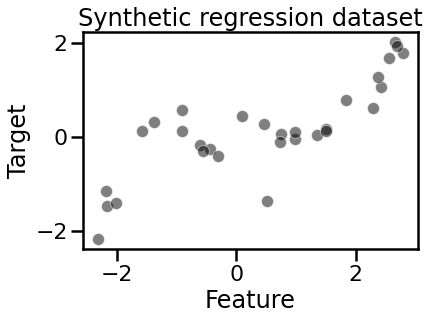

In [52]:
data_train, data_test, target_train = generate_data(n_samples=30)
sns.scatterplot(x=data_train["Feature"], y=target_train, color="black",
                alpha=0.5)
_ = plt.title("Synthetic regression dataset")

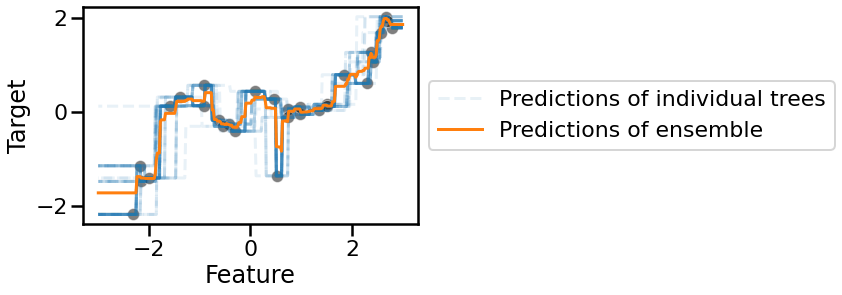

In [64]:
from sklearn.ensemble import BaggingRegressor

bagged_trees = BaggingRegressor(n_estimators=50, random_state=0)
bagged_trees.fit(data_train, target_train)

for tree_idx, tree in enumerate(bagged_trees.estimators_):
    label = "Predictions of individual trees" if tree_idx == 0 else None
    tree_predictions = tree.predict(data_test)
    plt.plot(data_test, tree_predictions, linestyle="--", alpha=0.1,
             color="tab:blue", label=label)

sns.scatterplot(x=data_train["Feature"], y=target_train, color="black",
                alpha=0.5)

bagged_trees_predictions = bagged_trees.predict(data_test)
plt.plot(data_test, bagged_trees_predictions,
         color="tab:orange", label="Predictions of ensemble")
_ = plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

In [65]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

polynomial_regressor = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(degree=4),
    Ridge(alpha=1e-10),
)

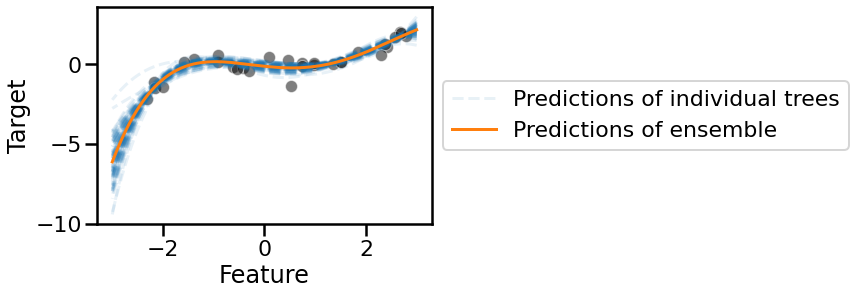

In [66]:
from sklearn.ensemble import BaggingRegressor

bagged_trees = BaggingRegressor(
    n_estimators=100, base_estimator=polynomial_regressor, random_state=0
)
bagged_trees.fit(data_train, target_train)

for tree_idx, tree in enumerate(bagged_trees.estimators_):
    label = "Predictions of individual trees" if tree_idx == 0 else None
    tree_predictions = tree.predict(data_test)
    plt.plot(data_test, tree_predictions, linestyle="--", alpha=0.1,
             color="tab:blue", label=label)

sns.scatterplot(x=data_train["Feature"], y=target_train, color="black",
                alpha=0.5)

bagged_trees_predictions = bagged_trees.predict(data_test)
plt.plot(data_test, bagged_trees_predictions,
         color="tab:orange", label="Predictions of ensemble")
_ = plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

## Random Forests

### Random forest classifier

A very famous classifier is the random forest classifier. It is similar to the bagging classifier. In addition of the bootstrap, the random forest will use a subset of features (selected randomly) to find the best split.

<div class="alert alert-success">
    <b>EXERCISE: Create a random forest classifier</b>:
    <br>
    Use your previous code which was generated several `DecisionTreeClassifier`. Check the list of the option of this classifier and modify one of the parameters such that only the $\sqrt{F}$ features are used for the splitting. $F$ represents the number of features in the dataset.
</div>

<div class="alert alert-success">
    <b>EXERCISE: using scikit-learn</b>:
    <br>
    After implementing your own random forest classifier, use a `RandomForestClassifier` from scikit-learn to fit the above data.
</div>

### Random forest regressor

### Hyperparameters